In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import dataGathandMan
from minisom import MiniSom
from itertools import product
import pickle

In [2]:
# Get all image paths in the folder
folder_path = "/home/tcarlyon/classes/aiclass/RawData/"
image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tiff')]
square_size = 64

# Randomly sample patches
random_all_patches = dataGathandMan.random_sample_patches(image_paths, square_size)
# Ensure the data shape is correct
print(f"random_all_patches shape: {random_all_patches.shape}")

Image /home/tcarlyon/classes/aiclass/RawData/IR.tiff has 4 bands
Image /home/tcarlyon/classes/aiclass/RawData/IR.tiff first three data values: [181 195 108]
Image /home/tcarlyon/classes/aiclass/RawData/Visible.tiff has 4 bands
Image /home/tcarlyon/classes/aiclass/RawData/Visible.tiff first three data values: [ 83 107  77]
Image /home/tcarlyon/classes/aiclass/RawData/TreeCover.tiff has 4 bands
Image /home/tcarlyon/classes/aiclass/RawData/TreeCover.tiff first three data values: [0 0 0]
all_patches shape: (2048, 64, 64, 12)
random_all_patches shape: (2048, 64, 64, 12)


In [3]:
# Reshape the data for clustering
reshaped_patches = random_all_patches.reshape(2048 * square_size**2, 12)
print(reshaped_patches.shape)
print(f"first data point before reshape: {random_all_patches[0, 0, 0, :]}")
print(f"first data point after reshape: {reshaped_patches[0]}")
print(f"last data point before reshape: {random_all_patches[-1, -1, -1, :]}")
print(f"last data point after reshape: {reshaped_patches[-1]}")



(8388608, 12)
first data point before reshape: [131.      136.       56.        2.       88.      115.      106.
 287.60547  31.      167.      186.      167.     ]
first data point after reshape: [131.      136.       56.        2.       88.      115.      106.
 287.60547  31.      167.      186.      167.     ]
last data point before reshape: [124.     173.      32.       0.      74.      92.      76.     242.7539
   0.      34.     119.      34.    ]
last data point after reshape: [124.     173.      32.       0.      74.      92.      76.     242.7539
   0.      34.     119.      34.    ]


In [4]:
# SOM hyperparameters

# set som lattice dimensions (i.e., number of nodes)
som_grid_rows = 3
som_grid_columns = 3

# number of weights per node
input_length = 12

# Spread of the neighborhood function, needs to be adequate to the dimensions
# of the map. (rows/columns minus 1 usually)
sigma = 2.0

# initial learning rate (at the iteration t we have learning_rate(t) =
# learning_rate / (1 + t/T) where T is #num_iteration/2)
learning_rate = 0.5

# Function that reduces learning_rate at each iteration
# Possible values: 'inverse_decay_to_zero', 'linear_decay_to_zero', 'asymptotic_decay'
# 'inverse_decay_to_zero' == > C = max_iter / 100.0; where, learning_rate * C / (C + t)
# 'linear_decay_to_zero' == > learning_rate * (1 - t / max_iter)
# 'asymptotic_decay' == > dynamic_parameter / (1 + t / (max_iter / 2))
# ^^Decay function of the learning process and sigma that decays these values asymptotically to 1/3 of their original values.
decay_function='inverse_decay_to_zero'

# Function that reduces sigma at each iteration.
# Possible values: 'inverse_decay_to_one', 'linear_decay_to_one', 'asymptotic_decay'
# 'inverse_decay_to_one' == > C = (sigma - 1) / max_iter; where, sigma / (1 + (t * C))
# 'linear_decay_to_one' == > sigma + (t * (1 - sigma) / max_iter)
sigma_decay_function='inverse_decay_to_one'

# Function that weights the neighborhood of a position in the map.
# Possible values: 'gaussian', 'mexican_hat', 'bubble', 'triangle',
# which takes in sigma.
neighborhood_function = 'gaussian'

# Topology of the map; Possible values: 'rectangular', 'hexagonal'
topology = 'rectangular'

# Distance used to activate the map; Possible values: 'euclidean', 'cosine', 'manhattan', 'chebyshev'
activation_distance = 'euclidean'

# Random seed to use for reproducibility. Using 1.
random_seed = 1

In [5]:
# lets create our som object with preset hyperparameters
som = MiniSom(
            som_grid_rows,
            som_grid_columns,
            input_length,
            sigma,
            learning_rate,
            decay_function,
            neighborhood_function,
            topology,
            activation_distance,
            random_seed,
            sigma_decay_function
            )

In [6]:
som

 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 144.58602544150787
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 171.04449744890812
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 198.16811087128795
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 222.12820384938323
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 241.7660476880245
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 257.2265483906894
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 269.07487827602364
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 278.0065649580539
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 284.6728138374346
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 289.61785789530734
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 293.2723933506965
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 295.96724882442317
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 297.9520175069341
 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 299.4129400084583

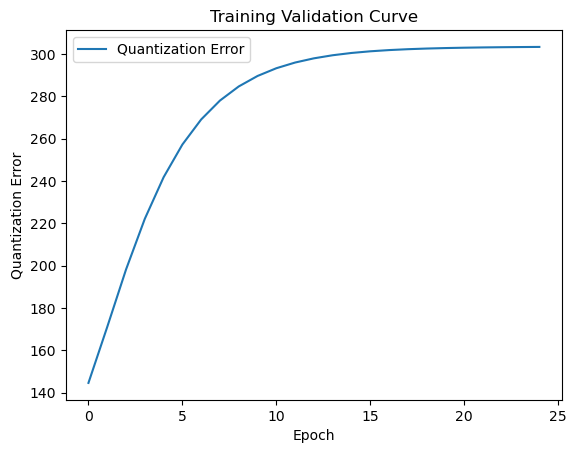

In [7]:
# some training hyperparameters
epochs = 25
random_order = True
verbose = True

# let's initialize the weights
som.random_weights_init(reshaped_patches)
# now train!
errors = []
for epoch in range(epochs):
    som.train(reshaped_patches, 1, random_order, verbose)
    quantization_error = som.quantization_error(reshaped_patches)
    errors.append(quantization_error)

# Plot the training validation curve
plt.figure()
plt.plot(range(epochs), errors, label="Quantization Error")
plt.xlabel("Epoch")
plt.ylabel("Quantization Error")
plt.title("Training Validation Curve")
plt.legend()
plt.show()

# saving the som in the file som.p
with open('som.p', 'wb') as outfile:
    pickle.dump(som, outfile)

random_all_patches shape: (2048, 64, 64, 12)


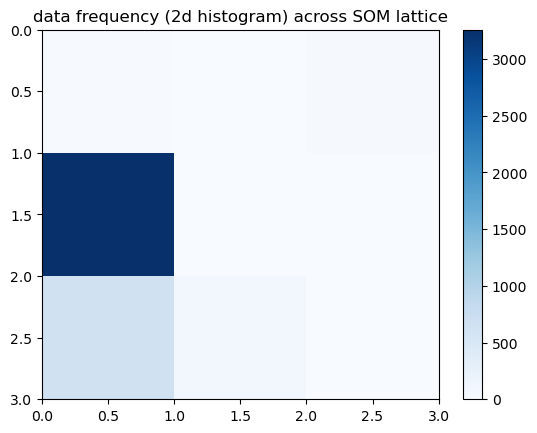

In [8]:
print(f"random_all_patches shape: {random_all_patches.shape}")
plt.figure()
frequencies = som.activation_response(random_all_patches[0].reshape(square_size**2, 12))
plt.pcolormesh(frequencies, cmap='Blues')
plt.colorbar()
plt.title("data frequency (2d histogram) across SOM lattice", fontsize=12)
plt.ylim(som_grid_rows, 0)  # flip the y axis to be the same as composite map axes later
plt.show()


In [9]:
# grabbing indices from SOM

# create an empty dictionary using the rows and columns of SOM
keys = [i for i in product(range(som_grid_rows), range(som_grid_columns))]
winmap = {key: [] for key in keys}

# grab the indices for the data within the SOM lattice
for i, x in enumerate(random_all_patches[0].reshape(square_size ** 2, 12)):
    winmap[som.winner(x)].append(i)

som_keys = list(winmap.keys())
print(f"Number of SOM nodes: {len(som_keys)}")

Number of SOM nodes: 9


In [10]:
winmap[(0,0)]

[890, 954, 1087, 1567, 2206, 2270, 2710, 3157, 3364, 3428, 3492, 3615, 3804]

In [11]:
# Define cluster_dict from winmap
cluster_dict = {key: value for key, value in winmap.items() if value}

# Define height and width based on square_size
height, width = square_size, square_size

# Initialize a 1D array for cluster labels, default to -1 (unlabeled)
flattened_labels = np.full(square_size**2, -1)

# Assign each pixel to its corresponding cluster index
for cluster_idx, (cluster_name, pixel_indices) in enumerate(cluster_dict.items()):
    flattened_labels[pixel_indices] = cluster_idx  # Assign a unique index to each cluster

# Reshape to 2D
image_clusters = flattened_labels.reshape(height, width)


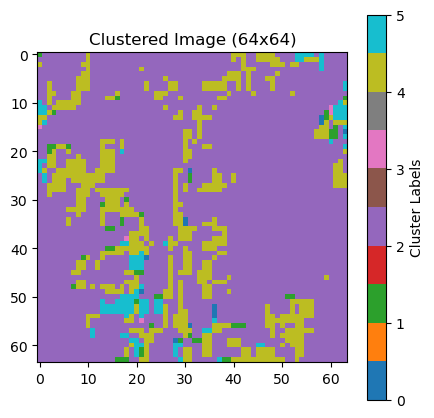

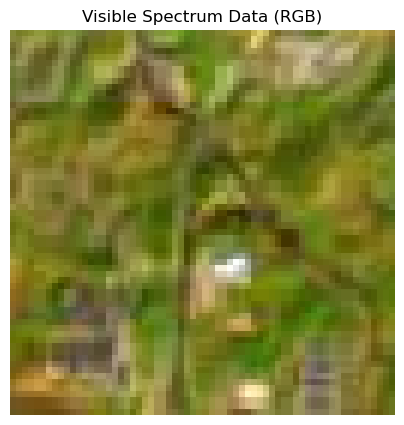

In [23]:

# Plot the clustered image
plt.figure(figsize=(5, 5))
plt.imshow(image_clusters, cmap="tab10", interpolation="nearest")
plt.colorbar(ticks=range(len(cluster_dict)), label="Cluster Labels")
plt.title(f"Clustered Image ({square_size}x{square_size})")
plt.show()

# Plot the visible spectrum data as an RGB image
plt.figure(figsize=(5, 5))
rgb_image = random_all_patches[0, :, :, :3] / 255.0  # Normalize to [0, 1] range for RGB
plt.imshow(rgb_image, interpolation="nearest")
plt.title("Visible Spectrum Data (RGB)")
plt.axis("off")  # Turn off axis for better visualization
plt.show()